In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
filename1= 'title.basics.tsv.gz'
filename2 = 'title.episode.tsv.gz'

In [2]:
dftv = pd.read_table(filename1,compression='gzip',sep='\t', na_values='\\N')
dfeps = pd.read_table(filename2,compression='gzip',sep='\t', na_values='\\N')

print(dftv.head())
print(dfeps.head())

/Users/claireramming/Applications/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult  startYear  endYear runtimeMinutes                    genres  
0        0     1894.0      NaN              1         Documentary,Short  
1        0     1892.0      NaN              5           Animation,Short  
2        0     1892.0      NaN              4  Animation,Comedy,Romance  
3        0     1892.0      NaN            NaN           Animation,Short  
4        0     1893.0      NaN              1                     Short  
      tconst parentTconst  seasonNumber  episodeNumber
0  tt0041951    tt0041038           1.0            9.0
1

In [3]:
#df.titleType.unique()
# & (df.startYear > 1967)

#fill NA with zero so we can convert to integers
dftv.fillna(0, inplace=True)

#limit to just TV series info from last 50 years
tv = dftv[(dftv.titleType == 'tvSeries') & ((dftv.endYear > 1967) | ((dftv.startYear > 1967) & (dftv.endYear == 0)))]

#reset index
tv.reset_index(inplace=True)

#limit to only needed columns
tv=tv[['tconst', 'primaryTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']] 

#change data types
tv = tv.astype({'startYear':np.int64, 'endYear':np.int64, 'runtimeMinutes':np.int64})
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132229 entries, 0 to 132228
Data columns (total 7 columns):
tconst            132229 non-null object
primaryTitle      132229 non-null object
isAdult           132229 non-null int64
startYear         132229 non-null int64
endYear           132229 non-null int64
runtimeMinutes    132229 non-null int64
genres            132229 non-null object
dtypes: int64(4), object(3)
memory usage: 7.1+ MB


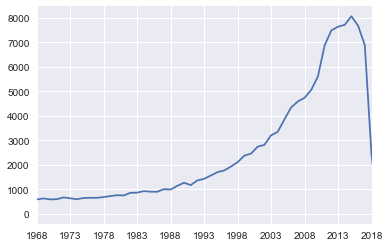

In [4]:
p = plt.plot(tv.tconst.groupby(tv.startYear).count())
plt.xlim(1968,2018)
plt.xticks(range(1968,2019,5))
plt.show()

In [5]:
tv.genres.replace(0,'None', inplace=True)
tv.tconst.groupby(tv.genres).count().head()

genres
Action                        805
Action,Adult                    3
Action,Adult,Horror             1
Action,Adventure               46
Action,Adventure,Animation    593
Name: tconst, dtype: int64

In [6]:
from collections import defaultdict
from collections import Counter

genrecount= Counter()
genres_dict = defaultdict(list)
for index, genres in tv.genres.iteritems():
    str(genres)
    genres = genres.split(',')
    for genre in genres:
        genrecount[genre] += 1
        genres_dict[index].append(genre)

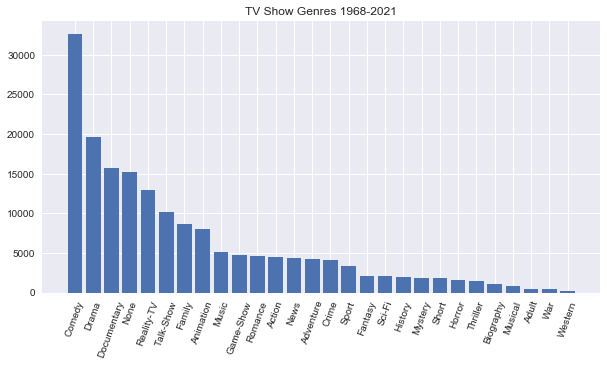

In [7]:
#barplot of genres
labels, values = zip(*genrecount.most_common())
indexes = np.arange(len(labels))

plt.figure(figsize=(10,5))
plt.title('TV Show Genres 1968-2021')

plt.bar(indexes, values)
plt.xticks(indexes, labels, rotation=70)
plt.show()

In [8]:
#find out how many seasons for each show, maybe then do breakdown by genre/histogram by genre
#number of comedies by year? overall genres by year? Might find interesting peaks
#get some interactive graphs going with bokeh! sliders!
eps = dfeps.dropna()
eps.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1.0,9.0
1,tt0042816,tt0989125,1.0,17.0
3,tt0043426,tt0040051,3.0,42.0
4,tt0043631,tt0989125,2.0,16.0
5,tt0043693,tt0989125,2.0,8.0


In [9]:
numberOfSeasons = eps.seasonNumber.groupby(eps.parentTconst).max()
numberOfSeasons.name = 'numberOfSeasons'
tv = tv.join(numberOfSeasons, 'tconst')
tv.head()

,tconst,primaryTitle,isAdult,startYear,endYear,runtimeMinutes,genres,numberOfSeasons
0,tt0040053,The Ed Sullivan Show,0,1948,1971,60,"Comedy,Music",24.0
1,tt0043214,Love of Life,0,1951,1980,25,"Drama,Romance",1.0
2,tt0043224,The Red Skelton Hour,0,1951,2016,60,Comedy,20.0
3,tt0043229,Search for Tomorrow,0,1951,1986,30,"Drama,Romance",1.0
4,tt0043244,Mr. Wizard,0,1951,1972,30,Family,NaN


In [10]:
#confirm join worked correctly and number of rows is still the same
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132229 entries, 0 to 132228
Data columns (total 8 columns):
tconst             132229 non-null object
primaryTitle       132229 non-null object
isAdult            132229 non-null int64
startYear          132229 non-null int64
endYear            132229 non-null int64
runtimeMinutes     132229 non-null int64
genres             132229 non-null object
numberOfSeasons    75704 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 8.1+ MB


In [25]:
tv['estNumSeasons'] = tv.endYear - tv.startYear + 1
tv.head()

,tconst,primaryTitle,isAdult,startYear,endYear,runtimeMinutes,genres,numberOfSeasons,estNumSeasons
0,tt0040053,The Ed Sullivan Show,0,1948,1971,60,"Comedy,Music",24.0,24
1,tt0043214,Love of Life,0,1951,1980,25,"Drama,Romance",1.0,30
2,tt0043224,The Red Skelton Hour,0,1951,2016,60,Comedy,20.0,66
3,tt0043229,Search for Tomorrow,0,1951,1986,30,"Drama,Romance",1.0,36
4,tt0043244,Mr. Wizard,0,1951,1972,30,Family,NaN,22


In [76]:
'''If the episode dataframe had a number of seasons greater than one, assume the value is correct. 
If the episode dataframe had a number of seasons equal to 1, but an end year exists, trust the estimate.'''
for row in tv[(tv.estNumSeasons > 33) & (tv.numberOfSeasons == 1)].estNumSeasons.items():
    tv.loc[row[0], 'numberOfSeasons'] = row[1]
    
'''If they don't have any seasons listed in the episodes dataframe but they do have an end year
assume # seasons is end year - start year + 1 (aka estimated number of seasons)'''
for row in tv[(tv.numberOfSeasons.isnull()) & (tv.estNumSeasons > 0)].estNumSeasons.items():
    tv.loc[row[0], 'numberOfSeasons'] = row[1]
    
'''give shows the benefit of the doubt, if they don't have any seasons listed in the episodes data frame, 
and they don't have an end date listed, assume they are still on air, so # of seasons is 2018 - start year + 1'''
for row in tv[(tv.numberOfSeasons.isnull()) & (tv.estNumSeasons <= 0)].estNumSeasons.items():
    tv.loc[row[0], 'numberOfSeasons'] = row[1] + 2018

'''If the episodes dataframe had a number os seasons equal to 1, and the start year and end year are more than 1 year apart'''    
for row in tv[(tv.estNumSeasons <= 33) & (tv.numberOfSeasons == 1) & (tv.estNumSeasons > 1) & (tv.startYear - tv.endYear != 1)].estNumSeasons.items():
    tv.loc[row[0], 'numberOfSeasons'] = row[1]

'''extra cleanup needed'''    
for row in tv[(tv.numberOfSeasons > 51) & (tv.numberOfSeasons != tv.estNumSeasons + 2018) & (tv.estNumSeasons < 0)].estNumSeasons.items():
    tv.loc[row[0], 'numberOfSeasons'] = row[1] + 2018
    
#change column to int and doublecheck dataframe numbers
tv.numberOfSeasons = tv.numberOfSeasons.astype(np.int64)
tv.info()

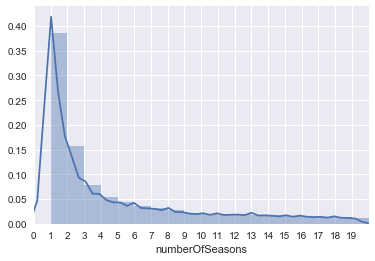

In [119]:
plt.xlim(0,20)
plt.xticks(range(0,20,1))
sns.distplot(tv[(tv.startYear >= 2000) & (tv.startYear < 2017)].numberOfSeasons)
#a little under 40% of shows seem to get cancelled after 1 season

In [128]:
from bokeh.io import output_notebook
output_notebook()
from bokeh.charts import Histogram
from bokeh.charts import defaults, show, output_file

hist = Histogram(tv[tv.startYear == 2015].numberOfSeasons, title="# of Seasons")

show(hist)

Loading BokehJS ...